#데이터 로드 및 정제

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
my_data = pd.read_csv('/content/drive/Shareddrives/KUBIG 크롤링 프로젝트 2조/크롤링&토큰화/dataset_2nd.csv')
len(my_data)

22719

In [ ]:
my_data[:5]

,text,satisfaction
0,중학교 때 배운 stem &leaf 부터 시작하기 때문에 고등학교 과정 통계를 제대...,5
1,내용 자체가 한국에서 고등학교 졸업을 했기만 하면 다 이해할 수 있는 내용이라 어려...,3
2,우선 생각보다 내용이 쉽습니다. 시험 공부부터 시작해서 과제에 시간을 많이 쓰지 않...,4
3,교수님께서 되게 친절하게 설명해주십니다. 영어로 수업을 진행하다보니 알아듣지 못하는...,3
4,무난무난한 통계 강의인 것 같습니다. 저는 까먹고 과제 제출을 한번 늦게 하고 기말...,4


In [ ]:
klue = my_data[['text', 'satisfaction']]
klue[:5]

,text,satisfaction
0,중학교 때 배운 stem &leaf 부터 시작하기 때문에 고등학교 과정 통계를 제대...,5
1,내용 자체가 한국에서 고등학교 졸업을 했기만 하면 다 이해할 수 있는 내용이라 어려...,3
2,우선 생각보다 내용이 쉽습니다. 시험 공부부터 시작해서 과제에 시간을 많이 쓰지 않...,4
3,교수님께서 되게 친절하게 설명해주십니다. 영어로 수업을 진행하다보니 알아듣지 못하는...,3
4,무난무난한 통계 강의인 것 같습니다. 저는 까먹고 과제 제출을 한번 늦게 하고 기말...,4


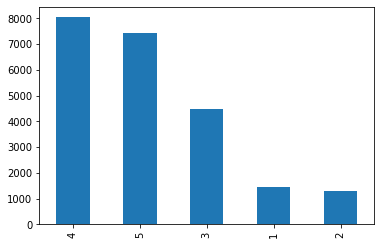

In [ ]:
klue['satisfaction'].value_counts().plot(kind = 'bar')

In [ ]:
for i in range(len(klue)):
  if klue['satisfaction'][i]>3:
    klue['satisfaction'][i] = 1
  else:
    klue['satisfaction'][i] = 0

klue[:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,text,satisfaction
0,중학교 때 배운 stem &leaf 부터 시작하기 때문에 고등학교 과정 통계를 제대...,1
1,내용 자체가 한국에서 고등학교 졸업을 했기만 하면 다 이해할 수 있는 내용이라 어려...,0
2,우선 생각보다 내용이 쉽습니다. 시험 공부부터 시작해서 과제에 시간을 많이 쓰지 않...,1
3,교수님께서 되게 친절하게 설명해주십니다. 영어로 수업을 진행하다보니 알아듣지 못하는...,0
4,무난무난한 통계 강의인 것 같습니다. 저는 까먹고 과제 제출을 한번 늦게 하고 기말...,1


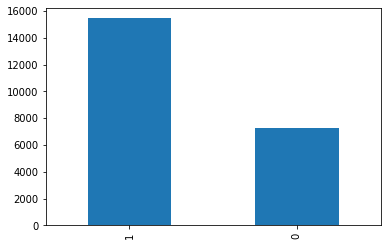

In [ ]:
klue['satisfaction'].value_counts().plot(kind = 'bar')

In [ ]:
klue.isna().sum()

text            0
satisfaction    0
dtype: int64

In [ ]:
klue.duplicated().sum()

0

In [ ]:
klue['text'] = klue['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
klue[:5]

,text,satisfaction
0,중학교 때 배운 부터 시작하기 때문에 고등학교 과정 통계를 제대로 공부했다면 전...,1
1,내용 자체가 한국에서 고등학교 졸업을 했기만 하면 다 이해할 수 있는 내용이라 어려...,0
2,우선 생각보다 내용이 쉽습니다 시험 공부부터 시작해서 과제에 시간을 많이 쓰지 않아...,1
3,교수님께서 되게 친절하게 설명해주십니다 영어로 수업을 진행하다보니 알아듣지 못하는 ...,0
4,무난무난한 통계 강의인 것 같습니다 저는 까먹고 과제 제출을 한번 늦게 하고 기말고...,1


In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(klue, test_size = 0.2, random_state = 1)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 18175
테스트용 리뷰의 개수 : 4544


# 토큰화

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.5MB/s 
     |████████████████████████████████| 460kB 42.8MB/s 
     |████████████████████████████████| 92kB 13.8MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
X_train = []
for sentence in train_data['text']:
  temp = []
  for word in okt.pos(str(sentence), stem = True):
    if word[1] in ['Adjective', 'Adverb', 'Determiner', 'Exclamation', 'Noun', 'Verb', 'KoreanParticle']:
      temp.append(word[0])
  X_train.append(temp)

In [ ]:
X_train[:3]

[['여러가지',
  '기업',
  '재무',
  '지식',
  '알다',
  '수업',
  '이다',
  '교수',
  '젠틀',
  '하다',
  '수업',
  '중후',
  '반',
  '가면',
  '배우다',
  '내용',
  '너무',
  '어려워지다',
  '어느',
  '순간',
  '수업',
  '놓다',
  '버리다',
  '자신',
  '발견',
  '하다',
  '되다',
  '과제',
  '개인',
  '과제',
  '번',
  '팀',
  '과제',
  '번',
  '개인',
  '과제',
  '그냥',
  '케이스',
  '읽다',
  '하다',
  '풀다',
  '부담',
  '거의',
  '없다',
  '과제',
  '팀',
  '과제',
  '상당하다',
  '복잡하다',
  '내용',
  '류',
  '이',
  '션',
  '하다',
  '줄',
  '알다',
  '인물',
  '한',
  '명',
  '필요하다',
  '시험',
  '걱정',
  '많다',
  '공식',
  '적히다',
  '포뮬',
  '시트',
  '제공',
  '난이도',
  '배우다',
  '비',
  '하다',
  '평이하다',
  '나오다',
  '걱정',
  '많다',
  '의외로',
  '평균',
  '낮다',
  '나오다',
  '성적',
  '자다',
  '나오다',
  '편입',
  '니'],
 ['학점', '줍다', '배우다', '내용', '너무', '어렵다', '수업', '어렵다'],
 ['열심히',
  '하다',
  '하다',
  '중간',
  '말',
  '다',
  '보고',
  '팀플',
  '있다',
  '교수',
  '굉장하다',
  '똑똑하다',
  '수업',
  '준비',
  '해오다',
  '진도',
  '빠르다',
  '나가다',
  '선물옵션',
  '공부',
  '열심히',
  '하다',
  '생각',
  '이',
  '시',
  '듣다',
  '좋다',
  '것',
  '같다']]

In [ ]:
X_test = []
for sentence in test_data['text']:
  temp = []
  for word in okt.pos(str(sentence), stem = True):
    if word[1] in ['Adjective', 'Adverb', 'Determiner', 'Exclamation', 'Noun', 'Verb', 'KoreanParticle']:
      temp.append(word[0])
  X_test.append(temp)

In [ ]:
X_test[:3]

[['일단',
  '오',
  '완전',
  '쉬다',
  '이건',
  '아니다',
  '제겐',
  '다만',
  '수학',
  '오다',
  '먼저',
  '들다',
  '분',
  '혹은',
  '수학',
  '감각',
  '좀',
  '있다',
  '하다',
  '분',
  '쉬다',
  '것',
  '같다',
  '시험',
  '문제',
  '그냥',
  '모델링',
  '하다',
  '거구',
  '교수',
  '친절하다',
  '매시간',
  '설명',
  '자다',
  '해주다',
  '사실',
  '노',
  '베이스',
  '도',
  '복습',
  '좀',
  '하다',
  '충분하다',
  '나오다',
  '것',
  '같다',
  '수업',
  '시간',
  '수식',
  '쓰기',
  '엑셀',
  '실습',
  '시험',
  '모델링',
  '식',
  '쓰다',
  '겁니다',
  '엑셀',
  '써다',
  '근데',
  '수업',
  '시간',
  '실습',
  '교수',
  '하다',
  '따르다',
  '되다',
  '부담',
  '전혀',
  '없다'],
 ['정빈',
  '교수',
  '수업',
  '정말',
  '체계',
  '적다',
  '재미있다',
  '교수',
  '엄청',
  '젠틀',
  '하다',
  '팀',
  '만나다',
  '되다',
  '수업'],
 ['중간',
  '말',
  '나누다',
  '시험',
  '보다',
  '오히려',
  '좋다',
  '시험',
  '외',
  '탐구',
  '발표',
  '있다',
  '저',
  '하다',
  '않다',
  '하다',
  '것',
  '추천',
  '드리다',
  '대해',
  '더',
  '자세하다',
  '배우다',
  '수',
  '있다',
  '강의',
  '이다',
  '저',
  '예전',
  '배우다',
  '걸',
  '다',
  '까먹다',
  '강의',
  '따라가다',
  '좀',
  '힘들다',
  '수시',
  '과제',


# 정수 인코딩

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
print(tokenizer.word_index) # 빈도 수 순서대로 정렬

{'하다': 1, '있다': 2, '수업': 3, '교수': 4, '것': 5, '강의': 6, '시험': 7, '과제': 8, '이다': 9, '같다': 10, '자다': 11, '않다': 12, '되다': 13, '좋다': 14, '수': 15, '내용': 16, '들다': 17, '학점': 18, '문제': 19, '없다': 20, '많다': 21, '보다': 22, '말': 23, '어렵다': 24, '나오다': 25, '중간': 26, '받다': 27, '배우다': 28, '시간': 29, '생각': 30, '공부': 31, '정말': 32, '많이': 33, '출석': 34, '이': 35, '학기': 36, '해주다': 37, '때': 38, '점수': 39, '정도': 40, '다': 41, '번': 42, '기말고사': 43, '때문': 44, '팀': 45, '아니다': 46, '중간고사': 47, '학생': 48, '주다': 49, '듣다': 50, '너무': 51, '진행': 52, '설명': 53, '열심히': 54, '저': 55, '분': 56, '점': 57, '난이도': 58, '이해': 59, '매우': 60, '안': 61, '좀': 62, '성적': 63, '발표': 64, '쉬다': 65, '추천': 66, '되어다': 67, '조금': 68, '영어': 69, '부분': 70, '플': 71, '과목': 72, '그': 73, '주시': 74, '하나': 75, '그냥': 76, '거': 77, '그렇다': 78, '거의': 79, '모르다': 80, '힘들다': 81, '이번': 82, '알다': 83, '체크': 84, '질문': 85, '크다': 86, '퀴즈': 87, '그래도': 88, '개인': 89, '대해': 90, '자체': 91, '다른': 92, '중': 93, '팀플': 94, '싶다': 95, '더': 96, '제출': 97, '굉장하다': 98, '개': 99, '부담': 100, '모두': 10

In [ ]:
vocab_size = len(tokenizer.word_index) + 2
print('단어 집합의 크기 :',vocab_size)

In [ ]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

단어 집합의 크기 : 14144


In [ ]:
print(X_train[:3])

[[1200, 444, 577, 306, 83, 3, 9, 4, 1011, 1, 3, 2603, 785, 748, 28, 16, 51, 849, 499, 1201, 3, 730, 619, 286, 1875, 1, 13, 8, 89, 8, 42, 45, 8, 42, 89, 8, 76, 445, 103, 1, 122, 100, 79, 20, 8, 45, 8, 209, 1119, 16, 1477, 35, 1363, 1, 391, 83, 2055, 124, 308, 323, 7, 325, 21, 623, 1417, 7051, 842, 731, 58, 28, 270, 1, 711, 25, 325, 21, 1318, 299, 354, 25, 63, 11, 25, 296, 207], [18, 1356, 28, 16, 51, 24, 3, 24], [54, 1, 1, 26, 23, 41, 168, 94, 2, 4, 98, 1303, 3, 176, 948, 237, 329, 199, 1751, 31, 54, 1, 30, 35, 562, 50, 14, 5, 10]]


In [ ]:
y_train = np.array(train_data['satisfaction'])
y_test = np.array(test_data['satisfaction'])

# 빈 샘플 제거

In [ ]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [ ]:
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

18042
18042


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


# 패딩

리뷰의 최대 길이 : 1183
리뷰의 평균 길이 : 56.712282452056314


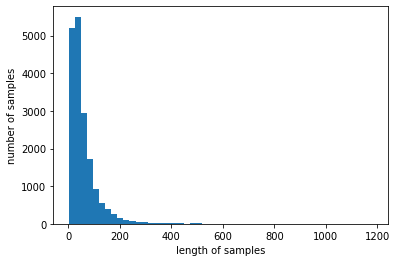

In [ ]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
max_len = 200
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 200 이하인 샘플의 비율: 97.32291320252745


In [ ]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

# Matrix 정의

In [ ]:
total = pd.DataFrame(columns=['accuracy'], index=['RNN', 'LSTM', 'GRU', 'Bi-LSTM', '1D CNN', 'Multi-Kernel 1D CNN', 'Bi-LSTM & Attention'])

# RNN

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
241/241 [==============================] - 38s 140ms/step - loss: 0.6293 - acc: 0.6601 - val_loss: 0.5673 - val_acc: 0.7196

Epoch 00001: val_acc improved from -inf to 0.71959, saving model to best_model.h5
Epoch 2/15
241/241 [==============================] - 33s 138ms/step - loss: 0.4913 - acc: 0.7691 - val_loss: 0.5691 - val_acc: 0.7135

Epoch 00002: val_acc did not improve from 0.71959
Epoch 3/15
241/241 [==============================] - 33s 138ms/step - loss: 0.3214 - acc: 0.8745 - val_loss: 0.6601 - val_acc: 0.7055

Epoch 00003: val_acc did not improve from 0.71959
Epoch 4/15
241/241 [==============================] - 33s 137ms/step - loss: 0.1685 - acc: 0.9405 - val_loss: 0.7969 - val_acc: 0.6825

Epoch 00004: val_acc did not improve from 0.71959
Epoch 00004: early stopping


In [ ]:
loaded_model = load_model('best_model.h5')
accuracy = loaded_model.evaluate(X_test, y_test)[1]
total['accuracy'][0] = accuracy
print("\n 테스트 정확도: %.4f" % (accuracy))

142/142 [==============================] - 2s 14ms/step - loss: 0.5621 - acc: 0.7130

 테스트 정확도: 0.7130


#LSTM

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc']) #  val_loss 손실이 4회 증가하면 Early Stopping
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2) # val_acc가 이전보다 좋아질 경우에만 모델을 저장

Epoch 1/15
241/241 [==============================] - 39s 25ms/step - loss: 0.6143 - acc: 0.6812 - val_loss: 0.5421 - val_acc: 0.7387

Epoch 00001: val_acc improved from -inf to 0.73871, saving model to best_model.h5
Epoch 2/15
241/241 [==============================] - 5s 21ms/step - loss: 0.5153 - acc: 0.7458 - val_loss: 0.5216 - val_acc: 0.7487

Epoch 00002: val_acc improved from 0.73871 to 0.74868, saving model to best_model.h5
Epoch 3/15
241/241 [==============================] - 5s 21ms/step - loss: 0.4736 - acc: 0.7810 - val_loss: 0.5265 - val_acc: 0.7343

Epoch 00003: val_acc did not improve from 0.74868
Epoch 4/15
241/241 [==============================] - 5s 21ms/step - loss: 0.4510 - acc: 0.7934 - val_loss: 0.5278 - val_acc: 0.7451

Epoch 00004: val_acc did not improve from 0.74868
Epoch 5/15
241/241 [==============================] - 5s 20ms/step - loss: 0.4210 - acc: 0.8114 - val_loss: 0.5381 - val_acc: 0.7406

Epoch 00005: val_acc did not improve from 0.74868
Epoch 00005:

In [ ]:
loaded_model = load_model('best_model.h5')
accuracy = loaded_model.evaluate(X_test, y_test)[1]
total['accuracy'][1] = accuracy
print("\n 테스트 정확도: %.4f" % (accuracy))

142/142 [==============================] - 1s 6ms/step - loss: 0.5217 - acc: 0.7478

 테스트 정확도: 0.7478


# GRU

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(GRU(128))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
241/241 [==============================] - 7s 20ms/step - loss: 0.6144 - acc: 0.6735 - val_loss: 0.5470 - val_acc: 0.7251

Epoch 00001: val_acc improved from -inf to 0.72513, saving model to best_model.h5
Epoch 2/15
241/241 [==============================] - 5s 19ms/step - loss: 0.5177 - acc: 0.7517 - val_loss: 0.5306 - val_acc: 0.7412

Epoch 00002: val_acc improved from 0.72513 to 0.74120, saving model to best_model.h5
Epoch 3/15
241/241 [==============================] - 5s 19ms/step - loss: 0.4780 - acc: 0.7753 - val_loss: 0.6168 - val_acc: 0.7298

Epoch 00003: val_acc did not improve from 0.74120
Epoch 4/15
241/241 [==============================] - 5s 19ms/step - loss: 0.4539 - acc: 0.7922 - val_loss: 0.5325 - val_acc: 0.7354

Epoch 00004: val_acc did not improve from 0.74120
Epoch 5/15
241/241 [==============================] - 5s 19ms/step - loss: 0.4220 - acc: 0.8094 - val_loss: 0.5540 - val_acc: 0.7373

Epoch 00005: val_acc did not improve from 0.74120
Epoch 00005: 

In [ ]:
loaded_model = load_model('best_model.h5')
accuracy = loaded_model.evaluate(X_test, y_test)[1]
total['accuracy'][2] = accuracy
print("\n 테스트 정확도: %.4f" % (accuracy))

142/142 [==============================] - 1s 5ms/step - loss: 0.5295 - acc: 0.7366

 테스트 정확도: 0.7366


# Bi-LSTM

In [ ]:
!pip install konlpy

In [ ]:
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import re
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
241/241 [==============================] - 12s 36ms/step - loss: 0.6067 - acc: 0.6874 - val_loss: 0.5408 - val_acc: 0.7376

Epoch 00001: val_acc improved from -inf to 0.73760, saving model to best_model.h5
Epoch 2/15
241/241 [==============================] - 7s 31ms/step - loss: 0.5065 - acc: 0.7578 - val_loss: 0.5580 - val_acc: 0.7229

Epoch 00002: val_acc did not improve from 0.73760
Epoch 3/15
241/241 [==============================] - 7s 31ms/step - loss: 0.4693 - acc: 0.7813 - val_loss: 0.5221 - val_acc: 0.7503

Epoch 00003: val_acc improved from 0.73760 to 0.75035, saving model to best_model.h5
Epoch 4/15
241/241 [==============================] - 7s 31ms/step - loss: 0.4462 - acc: 0.7975 - val_loss: 0.5454 - val_acc: 0.7467

Epoch 00004: val_acc did not improve from 0.75035
Epoch 5/15
241/241 [==============================] - 7s 31ms/step - loss: 0.4164 - acc: 0.8148 - val_loss: 0.5438 - val_acc: 0.7337

Epoch 00005: val_acc did not improve from 0.75035
Epoch 6/15
2

In [ ]:
loaded_model = load_model('best_model.h5')
accuracy = loaded_model.evaluate(X_test, y_test)[1]
total['accuracy'][3] = accuracy
print("\n 테스트 정확도: %.4f" % (accuracy))

142/142 [==============================] - 2s 8ms/step - loss: 0.5318 - acc: 0.7419

 테스트 정확도: 0.7419


#1D CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 256))
model.add(Dropout(0.3))
model.add(Conv1D(256, 3, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 3)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
241/241 [==============================] - 9s 29ms/step - loss: 0.6183 - acc: 0.6708 - val_loss: 0.5373 - val_acc: 0.7260

Epoch 00001: val_acc improved from -inf to 0.72596, saving model to best_model.h5
Epoch 2/15
241/241 [==============================] - 6s 26ms/step - loss: 0.5279 - acc: 0.7417 - val_loss: 0.5036 - val_acc: 0.7595

Epoch 00002: val_acc improved from 0.72596 to 0.75949, saving model to best_model.h5
Epoch 3/15
241/241 [==============================] - 6s 25ms/step - loss: 0.4582 - acc: 0.7912 - val_loss: 0.5090 - val_acc: 0.7623

Epoch 00003: val_acc improved from 0.75949 to 0.76226, saving model to best_model.h5
Epoch 4/15
241/241 [==============================] - 6s 24ms/step - loss: 0.3940 - acc: 0.8271 - val_loss: 0.5044 - val_acc: 0.7672

Epoch 00004: val_acc improved from 0.76226 to 0.76725, saving model to best_model.h5
Epoch 5/15
241/241 [==============================] - 6s 24ms/step - loss: 0.3202 - acc: 0.8683 - val_loss: 0.5654 - val_acc: 0

In [ ]:
loaded_model = load_model('best_model.h5')
accuracy = loaded_model.evaluate(X_test, y_test)[1]
total['accuracy'][4] = accuracy
print("\n 테스트 정확도: %.4f" % (accuracy))

142/142 [==============================] - 1s 4ms/step - loss: 0.5045 - acc: 0.7614

 테스트 정확도: 0.7614


# Multi-Kernel 1D CNN

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
embedding_dim = 128
dropout_prob = (0.5, 0.8)
num_filters = 128

In [ ]:
model_input = Input(shape = (max_len,))
z = Embedding(vocab_size, embedding_dim, input_length = max_len, name="embedding")(model_input)
z = Dropout(dropout_prob[0])(z)

In [ ]:
conv_blocks = []

for sz in [3, 4, 5]:
    conv = Conv1D(filters = num_filters,
                         kernel_size = sz,
                         padding = "valid",
                         activation = "relu",
                         strides = 1)(z)
    conv = GlobalMaxPooling1D()(conv)
    conv = Flatten()(conv)
    conv_blocks.append(conv)

In [ ]:
z = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
z = Dropout(dropout_prob[1])(z)
z = Dense(128, activation="relu")(z)
model_output = Dense(1, activation="sigmoid")(z)

model = Model(model_input, model_output)

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
241/241 [==============================] - 6s 19ms/step - loss: 0.6375 - acc: 0.6673 - val_loss: 0.6306 - val_acc: 0.6944

Epoch 00001: val_acc improved from -inf to 0.69438, saving model to best_model.h5
Epoch 2/15
241/241 [==============================] - 4s 17ms/step - loss: 0.6104 - acc: 0.6733 - val_loss: 0.5733 - val_acc: 0.7235

Epoch 00002: val_acc improved from 0.69438 to 0.72347, saving model to best_model.h5
Epoch 3/15
241/241 [==============================] - 4s 18ms/step - loss: 0.5810 - acc: 0.6999 - val_loss: 0.5350 - val_acc: 0.7451

Epoch 00003: val_acc improved from 0.72347 to 0.74508, saving model to best_model.h5
Epoch 4/15
241/241 [==============================] - 4s 17ms/step - loss: 0.5503 - acc: 0.7294 - val_loss: 0.5275 - val_acc: 0.7476

Epoch 00004: val_acc improved from 0.74508 to 0.74758, saving model to best_model.h5
Epoch 5/15
241/241 [==============================] - 4s 17ms/step - loss: 0.5275 - acc: 0.7439 - val_loss: 0.5261 - val_acc: 0

In [ ]:
loaded_model = load_model('best_model.h5')
accuracy = loaded_model.evaluate(X_test, y_test)[1]
total['accuracy'][5] = accuracy
print("\n 테스트 정확도: %.4f" % (accuracy))

142/142 [==============================] - 1s 4ms/step - loss: 0.5330 - acc: 0.7452

 테스트 정확도: 0.7452


#Bi-LSTM & Attention

In [ ]:
import tensorflow as tf

In [ ]:
class BahdanauAttention(tf.keras.Model):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = Dense(units)
    self.W2 = Dense(units)
    self.V = Dense(1)

  def call(self, values, query):
    hidden_with_time_axis = tf.expand_dims(query, 1)

    score = self.V(tf.nn.tanh(
        self.W1(values) + self.W2(hidden_with_time_axis)))

    attention_weights = tf.nn.softmax(score, axis=1)

    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, Concatenate, Dropout
from tensorflow.keras import Input, Model
from tensorflow.keras import optimizers
import os

In [ ]:
sequence_input = Input(shape=(max_len,), dtype='int32')
embedded_sequences = Embedding(vocab_size, 128, input_length=max_len, mask_zero = True)(sequence_input)

In [ ]:
lstm = Bidirectional(LSTM(64, dropout=0.5, return_sequences = True))(embedded_sequences)

In [ ]:
lstm, forward_h, forward_c, backward_h, backward_c = Bidirectional \
  (LSTM(64, dropout=0.5, return_sequences=True, return_state=True))(lstm)

In [ ]:
print(lstm.shape, forward_h.shape, forward_c.shape, backward_h.shape, backward_c.shape)

(None, 200, 128) (None, 64) (None, 64) (None, 64) (None, 64)


In [ ]:
state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])

In [ ]:
attention = BahdanauAttention(64)
context_vector, attention_weights = attention(lstm, state_h)

In [ ]:
dense1 = Dense(20, activation="relu")(context_vector)
dropout = Dropout(0.5)(dense1)
output = Dense(1, activation="sigmoid")(dropout)
model = Model(inputs=sequence_input, outputs=output)

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=3, batch_size=256, validation_split=0.2)

Epoch 1/3
57/57 [==============================] - 118s 2s/step - loss: 0.6359 - acc: 0.6707 - val_loss: 0.5906 - val_acc: 0.7085
Epoch 2/3
24/57 [===========>..................] - ETA: 50s - loss: 0.5758 - acc: 0.7063

In [ ]:
accuracy = model.evaluate(X_test, y_test)[1]
total['accuracy'][6] = accuracy
print("\n 테스트 정확도: %.4f" % (accuracy))

142/142 [==============================] - 29s 158ms/step - loss: 0.5274 - acc: 0.7394

 테스트 정확도: 0.7394


# 결과 확인

In [ ]:
total

,accuracy
RNN,0.713028
LSTM,0.747799
GRU,0.736576
Bi-LSTM,0.741857
1D CNN,0.761444
Multi-Kernel 1D CNN,0.745158
Bi-LSTM & Attention,0.739437
